In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

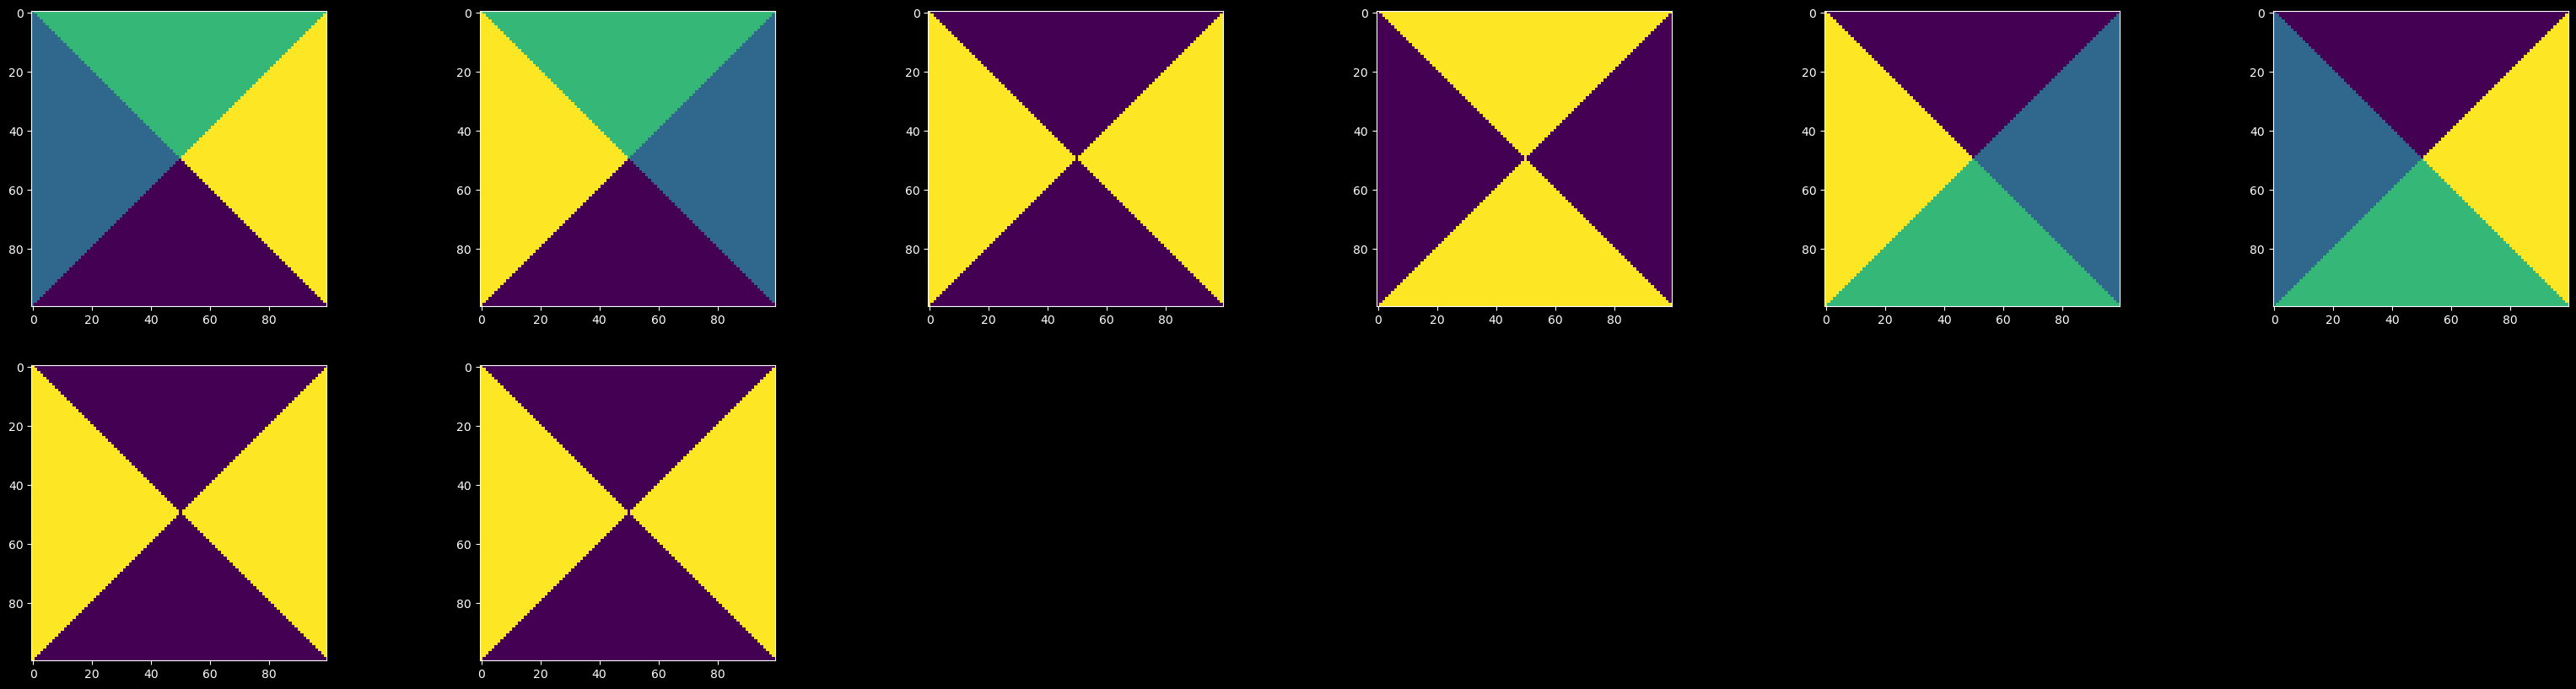

In [40]:
tiles = [
    [0, 1, 1, 1],
    [0, 2, 1, 2],
    [0, 1, 0, 0],
    [2, 3, 2, 1],
    [2, 2, 2, 3],
    [3, 3, 3, 1],
    [3, 1, 0, 2],
    [1, 2, 3, 2],
    [1, 2, 1, 3],
    [1, 0, 0, 2],
    [0, 1, 3, 0],
]


tiles = [
  [0, 1, 2, 3],
  [0, 3, 2, 1],
  [0, 1, 0, 1],
  [2, 1, 2, 1],
  [2, 3, 0, 1],
  [2, 1, 0, 3],
  [0, 3, 0, 3],
  [2, 3, 2, 3]
]

new_tiles = tiles
for k in [0, 1, 2, 3]:
  for t in tiles:
    



def plot_tile(tile):
    m = np.zeros((100, 100))
    
    for x, y in product(range(100), repeat=2):
        pos = ((x - 50) < (- y + 50)) + 2 * ((x - 50) < (y - 50))
        pos = [0, 1, 3, 2][pos]
        m[x, y] = tile[pos]

    plt.imshow(m)

plt.figure(figsize=(40, 10))

for i, t in enumerate(tiles):
    plt.subplot(2, 6, i+1)
    plot_tile(t)



# first algorithm: try and restart.

In [59]:
from random import shuffle


class Solver:
  def __init__(self, tiles, grid):
    self.tiles = tiles
    self.grid = grid
    self.errors = self.get_errors()

  @classmethod
  def fromRandom(cls, tiles, size=(3, 3)):
    return cls(tiles, np.random.randint(0, len(tiles), size=size))

  @property
  def energy(self):
    return np.sum(self.errors)/2

  def update(self, i, j, k):
    # changing tile in position i, j to k
    assert k in range(len(self.tiles))

    self.grid[i, j] = k

    self.errors[i, j] = self.cell_error(i, j)
    if i > 0:
      self.errors[i-1, j] = self.cell_error(i-1, j)
    if j > 0:
      self.errors[i, j-1] = self.cell_error(i, j-1)
    if i < self.grid.shape[0]-1:
      self.errors[i+1, j] = self.cell_error(i+1, j)
    if j < self.grid.shape[1]-1:
      self.errors[i, j+1] = self.cell_error(i, j+1)

  def stabilize(self, steps=100):
    for i in range(steps):
      while True:
        i = np.random.randint(0, self.grid.shape[0])
        j = np.random.randint(0, self.grid.shape[1])

        if self.errors[i, j]+1 > 6*np.random.random():
          break

      colors = np.array((
        self.tiles[self.grid[i-1][j]][2] if i > 0 else 0,
        self.tiles[self.grid[i][j-1]][3] if j > 0 else 1,
        self.tiles[self.grid[i+1][j]][0] if i < self.grid.shape[0] - 1 else 2,
        self.tiles[self.grid[i][j+1]][1] if j < self.grid.shape[1] - 1 else 3,
      ))

      p = np.exp(-np.sum((np.array(self.tiles) - colors) != 0, axis=1))
      p = p / np.sum(p)

      k = np.random.choice(len(self.tiles), p=p)

      self.update(i, j, k)

      print(self.energy)

    return self
    

  def cell_error(self, i, j):
    er = 0
    if i > 0:
      er += 1-(self.tiles[self.grid[i][j]][0] == self.tiles[self.grid[i-1][j]][2])
    if j > 0:
      er += 1-(self.tiles[self.grid[i][j]][1] == self.tiles[self.grid[i][j-1]][3])
    if i < self.grid.shape[0]-1:
      er += 1-(self.tiles[self.grid[i][j]][2] == self.tiles[self.grid[i+1][j]][0])
    if j < self.grid.shape[1]-1:
      er += 1-(self.tiles[self.grid[i][j]][3] == self.tiles[self.grid[i][j+1]][1])

    return er

  def get_errors(self):
    m = np.zeros(np.array(self.grid.shape))

    for i, j in product(*map(range, self.grid.shape)):
      m[i, j] = self.cell_error(i, j)
    
    return m

  def draw(self):
    k = 50
    m = np.zeros(k*np.array(self.grid.shape))
    
    for i, j in product(*map(range, self.grid.shape)):
      for x, y in product(range(k), repeat=2):
          pos = ((x - k/2) < (- y + k/2)) + 2 * ((x - k/2) < (y - k/2))
          pos = [0, 1, 3, 2][pos]
          m[i*k+x, j*k+y] = self.tiles[self.grid[i, j]][pos]

    plt.imshow(m)




In [60]:
s = Solver.fromRandom(tiles, (5, 5)).stabilize()
print(s.energy)
s.draw()

1


TypeError: only integer scalar arrays can be converted to a scalar index